In [20]:
import glob
import json

In [21]:
def read_file(path):
    with open(path,"r", encoding="UTF-8") as f: 
        chaine = f.read()
    return chaine
    

In [22]:
def read_json (chemin):
    with open(chemin) as json_data: 
        data =json.load(json_data)
    return data


## Exercice 1 : Opération sur les fichiers


In [23]:
chemin_txt="../ressources/ressources_TD6/Texte/DAUDET/DAUDET_ref/DAUDET_petit-chose_ref.txt"

texte=read_file(chemin_txt)
print(texte[:200])

PREMIÈRE PARTIE 
I -- LA FABRIQUE 
Je suis né le 13 mai 18..., dans une ville du Languedoc où l'on trouve, comme dans toutes les villes du Midi, beaucoup de soleil, pas mal de poussière, un couvent de


In [24]:
corpus="../ressources/ressources_TD6/Texte/*/*/*.txt"

for chemin in glob.glob(corpus):
    texte=read_file(chemin)
    print(chemin,"\n")
    print(texte[:200],"\n")

../ressources/ressources_TD6/Texte/DAUDET/DAUDET_ref/DAUDET_petit-chose_ref.txt 

PREMIÈRE PARTIE 
I -- LA FABRIQUE 
Je suis né le 13 mai 18..., dans une ville du Languedoc où l'on trouve, comme dans toutes les villes du Midi, beaucoup de soleil, pas mal de poussière, un couvent de 

../ressources/ressources_TD6/Texte/DAUDET/DAUDET_kraken-base/DAUDET_petit-chose_Kraken-base.txt 

LA FABRIOUE

EE
Je suis ne le rg mai 8..., dans une ville du Languedoc, oi l'on
trouve, comme dans toutes les villes du Midi, beaucoup de soleil, pas
mal de poussiere, un couvent de Carmelites et deux 

../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_kraken-base/MAUPASSANT_une-vie_Kraken-base.txt 

UNE IE
toujours, prete  saisir tous les bonheurs de la vie
dont elle revait depuis si longtemps, craignait que
son pere hesitat  partir si le temps ne s'eclaircissait
pas; et pour la centieme fois dep 

../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_ref/MAUPASSANT_une-vie_ref.txt 

I 
Jeanne, ayan

## Exercice 2 : Comprendre la différence entre texte, json et csv

In [25]:
data_json=read_json("../ressources/ressources_TD6/TD6_data_modeles/modeles.json")

print(data_json["pl"])
print(data_json["el"])

['to', 'and', 'of', 'the', 'się', 'do', 'z', 'na', 'i', 'w']
['που', 'η', 'του', 'το', 'των', 'να', 'για', 'την', 'της', 'και']


## Exercice 3 : Tokeniser, compter des effectifs et loi de Zipf 

In [13]:
import spacy

nlp=spacy.load("fr_core_news_lg")

In [27]:
import matplotlib.pyplot as pyplot

def tokeniser(doc):#Ici nous écrivons une fonction à partir du programme du TD5
    liste_tok=[]
    for token in doc:
        liste_tok.append(token.text)
    return(liste_tok)

## Les fonctions ci-dessous sont accessible dans le notebook "Loi de Zipf - Analyse de Brown corpus" sur Moodle

def texte_to_dict(liste_chaine):
    texte_dict = {}
    
    for token in liste_chaine:
        if token in texte_dict:
            texte_dict[token] += 1
        else:
            texte_dict[token] = 1

    return texte_dict

def dict_to_list(texte_dict):
    texte_list=[]

    for mot in texte_dict.keys():
        texte_list.append([texte_dict[mot], mot])    

    texte_list.sort(reverse=True)#sert à trier la liste par ordre décroissant. Pour trier dans l'ordre croissant mettre le paramètre reverse à "False"
    return texte_list

## Fonction pour crée le graphique
# def plot_zipf(texte_list, log=False):
#     pyplot.rcParams['figure.figsize'] = [15, 10]

#     y = [_[0] for _ in texte_list]

#     y_ = []
#     for _ in range(len(texte_list)):
#         y_.append(int(texte_list[0][0]/(_+1)))    

#     pyplot.plot(y, "-", label="Réelle")
#     pyplot.plot(y_, "--", label="Approximation (Zipf)") 
    
#     if log:
#         pyplot.yscale("log")
#         pyplot.xscale("log")     
      
#     pyplot.legend()
#     pyplot.title("Loi de Zipf (Brown Corpus)")
#     pyplot.xlabel("Rang")
#     pyplot.ylabel("Fréquence")
#     pyplot.show() 

Le sous-corpus analyser :  ../ressources/ressources_TD6/Texte/DAUDET 

Texte analysé :  ../ressources/ressources_TD6/Texte/DAUDET/DAUDET_ref/DAUDET_petit-chose_ref.txt
Texte analysé :  ../ressources/ressources_TD6/Texte/DAUDET/DAUDET_kraken-base/DAUDET_petit-chose_Kraken-base.txt


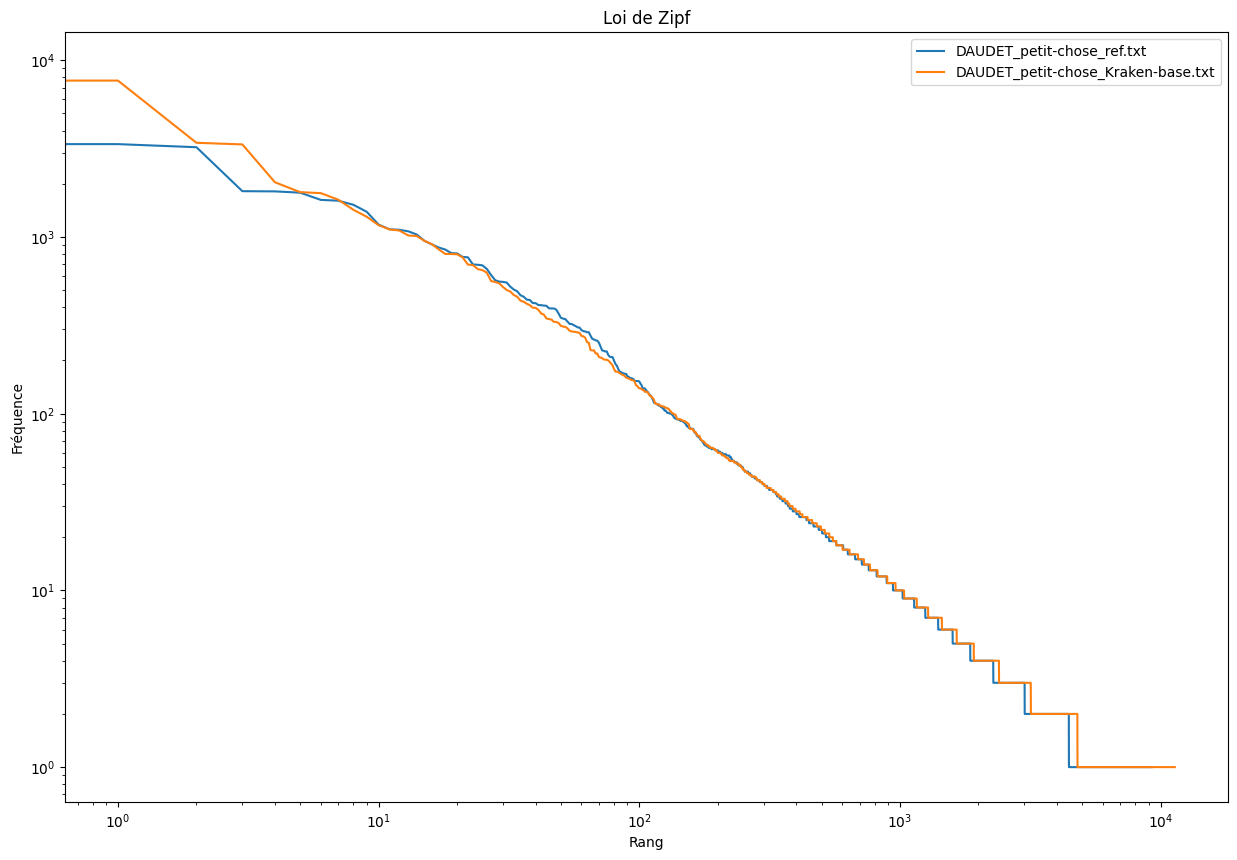

Le sous-corpus analyser :  ../ressources/ressources_TD6/Texte/MAUPASSANT 

Texte analysé :  ../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_kraken-base/MAUPASSANT_une-vie_Kraken-base.txt
Texte analysé :  ../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_ref/MAUPASSANT_une-vie_ref.txt


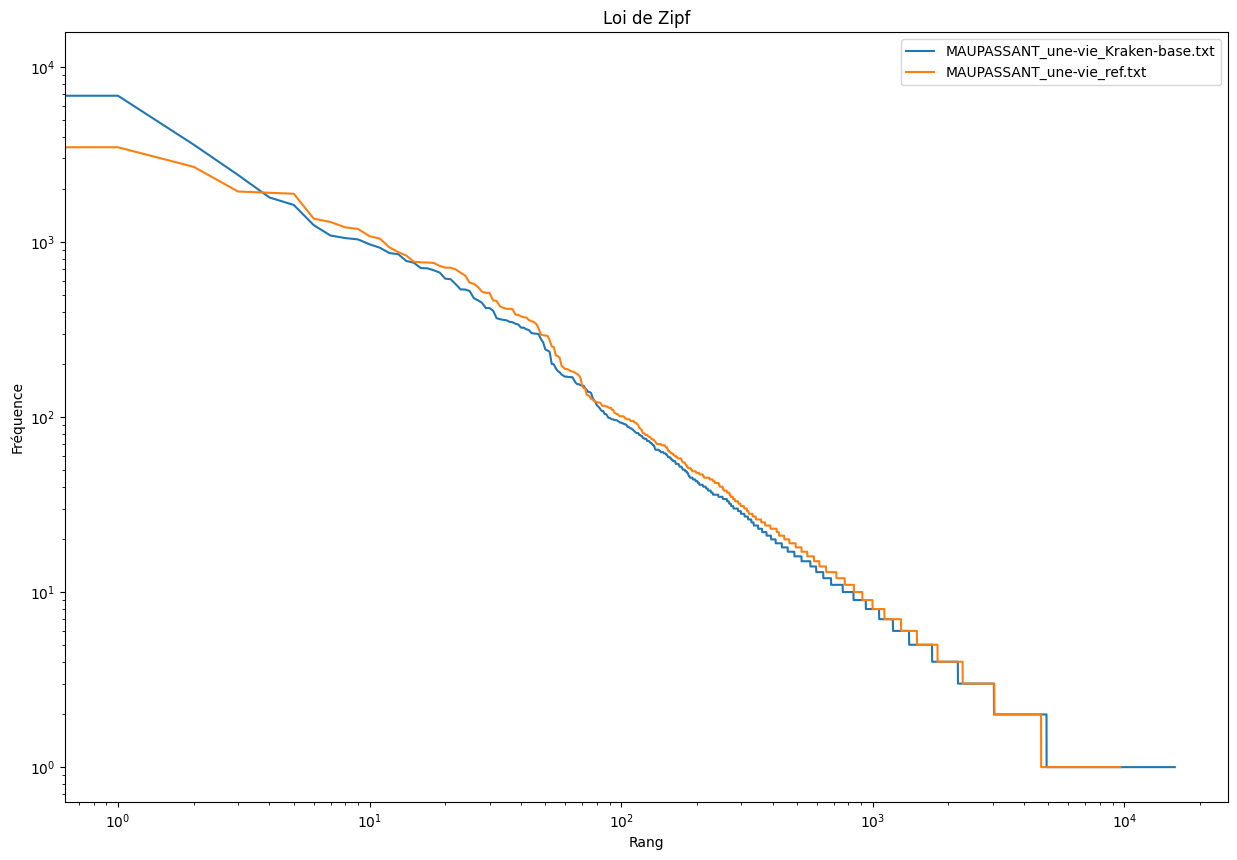

In [28]:
corpus="../ressources/ressources_TD6/Texte/*"
log=True#afficher le graphe de manière logarithmique. False= affichage linéaire

for subcorpus in glob.glob(corpus):#On veut pouvoir faire les calculs pour les deux fichiers rangés dans les deux répertoires _ref et _kraken-base pour chacun des dossiers AUTEUR (ici MAUPASSANT et DAUDET)
    print("Le sous-corpus analyser : ",subcorpus,"\n")
    liste_rang=[]
    liste_freq=[]
    liste_leg=[]
    i=0
    for ch in glob.glob("%s/*/*.txt"%subcorpus):
        contenu=read_file(ch)#La fonction est au début du notebook)
        document_analyse=nlp(contenu)
        liste_tokens=tokeniser(document_analyse)
        #définir le texte des légendes et le nom du fichier de la sortie
        output=ch.split("/")
        leg=output[-1]
        path_output=output[4]+"_zipf_corpus.png"
        liste_leg.append(leg)
        print("Texte analysé : ",ch)

        dico_zipf=texte_to_dict(liste_tokens)
#         print(dico_zipf)

        tableau=dict_to_list(dico_zipf)
#         print(tableau[:50])

        rang=[]
        for t in tableau:
            rang.append(tableau.index(t))
        #     print(rang)
        y = [_[0] for _ in tableau]
        #     print(y[:50])
        liste_rang.append(rang)
        liste_freq.append(y)
#         print(len(liste_rang))
#         print(len(liste_freq))


    for x in liste_rang:
        pyplot.rcParams['figure.figsize'] = [15, 10]
        pyplot.plot(x,liste_freq[i], label=liste_leg[i])
        i=i+1
        if log:
            pyplot.yscale("log")
            pyplot.xscale("log")

    pyplot.legend()
    pyplot.title("Loi de Zipf")
    pyplot.xlabel("Rang")
    pyplot.ylabel("Fréquence")
#     pyplot.savefig(f"{subcorpus}/{path_output}", dpi=300)##Pour stocker l'image sur sa machine
    pyplot.show()


## Exercice 4 : Lire et manipuler les modèles de langue

In [31]:
# lire le fichier
chemin_json="../ressources/ressources_TD6/TD6_data_modeles/modeles.json"
donnee=read_json(chemin_json)
# print(type(donnee))
# calculer l’intersection entre le modèle de langue anglais et les autres modèles de langue,

for k,val in donnee.items():
    intersection_set = set(donnee["en"]).intersection(set(val))
#     print(k,intersection_set)

# proposer à l’utilisateur d’entrer un terme en entrée et d’avoir en sortie les langues dans lesquelles le mot apparaît. Exemple de mots ”and”, ”the”, ”to”, ”on”, etc.

user=input("entre un mot :")
for k,val in donnee.items():
    if user in val:
        print(k)
#         print(val)


entre un mot :a
pt
es
cs
hu
en
ro
it
sk


## Exercice 5 : Stocker les résultats de la REN

In [32]:
def mod_lang(num):
    modele_langfr=["fr_core_news_lg","fr_core_news_sm"]
    modele=modele_langfr[num]
#     print("Le modèle dans la fonction",modele)
    
    return modele

def REN(texte_analyse, modele):
    i=0
    dico_en={}
    for ent in texte_analyse.ents:
        n_ent="Entité_"+str(i)
        dico_en[n_ent]={}
        dico_en[n_ent]["entité"]=ent.text
        dico_en[n_ent]["label"]=ent.label_

        i=i+1
    return dico_en

def stocker(chemin, contenu):
    w =open(chemin, "w")
    w.write(json.dumps(contenu , indent = 2))
    w.close()
    # print(chemin)
    
    return chemin

In [37]:
import time
 
start = time.time()

mod = mod_lang(0)#Paramétrage du modèle de langue
print("Le modèle de langue utilisé est : ",mod)
    
corpus="../ressources/ressources_TD6/Texte/*/*/*.txt"

for chemin in glob.glob(corpus):
    print("Le texte analysé est : ",chemin)
    texte=read_file(chemin)
#     texte=texte[:2000]
    
    nlp = spacy.load(mod)
    txt_an =  nlp(texte)

    dico_entite=REN(txt_an,mod)
    print("Le dictionnaire des entités nommées", dico_entite)

    end = time.time()
    elapsed = end - start

    print(f'Temps d\'exécution : {elapsed:.2}ms')
#     stocker(f"{chemin}_{mod}.json",dico_entite)

Le modèle de langue utilisé est :  fr_core_news_lg
../ressources/ressources_TD6/Texte/DAUDET/DAUDET_ref/DAUDET_petit-chose_ref.txt
Le dictionnaire des entités nommées {'Entité_0': {'entité': 'PARTIE \nI', 'label': 'MISC'}, 'Entité_1': {'entité': 'Languedoc', 'label': 'LOC'}, 'Entité_2': {'entité': 'Midi', 'label': 'LOC'}, 'Entité_3': {'entité': 'couvent de carmélites', 'label': 'LOC'}, 'Entité_4': {'entité': 'M. Eyssette', 'label': 'PER'}, 'Entité_5': {'entité': 'Eyssette', 'label': 'LOC'}, 'Entité_6': {'entité': 'Annou', 'label': 'LOC'}, 'Entité_7': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_8': {'entité': 'M. Eyssette', 'label': 'PER'}, 'Entité_9': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_10': {'entité': 'Petit Daniel', 'label': 'LOC'}, 'Entité_11': {'entité': 'Eyssette', 'label': 'PER'}, 'Entité_12': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_13': {'entité': 'Baptiste', 'label': 'PER'}, 'Entité_14': {'entité': 'M.', 'label': 'PER'}, 'Entité_15': {'entité': 'Mme E

Le dictionnaire des entités nommées {'Entité_0': {'entité': 'Languedoc', 'label': 'LOC'}, 'Entité_1': {'entité': 'Midi', 'label': 'LOC'}, 'Entité_2': {'entité': 'Carmelites', 'label': 'LOC'}, 'Entité_3': {'entité': 'M. Eyssette', 'label': 'PER'}, 'Entité_4': {'entité': 'regrettees', 'label': 'PER'}, 'Entité_5': {'entité': 'Source gallica.bnf.fr  Bibliotheque nationale', 'label': 'MISC'}, 'Entité_6': {'entité': 'FranceLE PETIT CHOSE\nJe dois dire', 'label': 'PER'}, 'Entité_7': {'entité': 'Eyssette', 'label': 'LOC'}, 'Entité_8': {'entité': 'Annou', 'label': 'LOC'}, 'Entité_9': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_10': {'entité': 'M. Eyssette', 'label': 'PER'}, 'Entité_11': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_12': {'entité': 'Daniel', 'label': 'PER'}, 'Entité_13': {'entité': 'Eyssette', 'label': 'PER'}, 'Entité_14': {'entité': 'Marseille', 'label': 'LOC'}, 'Entité_15': {'entité': 'meme annee', 'label': 'MISC'}, 'Entité_16': {'entité': 'Baptiste', 'label': 'PER'}, 

KeyboardInterrupt: 

In [41]:
chemin_json="../ressources/ressources_TD6/Texte/*/*/"
for ch_f in glob.glob(("%s*lg.json")%chemin_json):
    liste_enonce=[]
    liste_label=[]
    print(ch_f)
    donnee=read_json(ch_f)
    
    for k, val in donnee.items():
        for subk, content in val.items():  
            if subk =="label":
                liste_enonce.append(content)
    #Récupérer automatiquement le jeu de label utilisé
    set_label=set(liste_enonce)
    print(set_label)
    #compter les types d'entités par label
    for lab in list(set_label):
        print(lab," : ",liste_enonce.count(lab))

    
    
            

../ressources/ressources_TD6/Texte/DAUDET/DAUDET_ref/DAUDET_petit-chose_ref.txt_fr_core_news_lg.json
{'LOC', 'MISC', 'ORG', 'PER'}
LOC  :  744
MISC  :  697
ORG  :  91
PER  :  1626
../ressources/ressources_TD6/Texte/DAUDET/DAUDET_kraken-base/DAUDET_petit-chose_Kraken-base.txt_fr_core_news_lg.json
{'LOC', 'PER', 'MISC', 'ORG'}
LOC  :  1122
PER  :  2208
MISC  :  809
ORG  :  248
../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_kraken-base/MAUPASSANT_une-vie_Kraken-base.txt_fr_core_news_lg.json
{'PER', 'LOC', 'MISC', 'ORG'}
PER  :  2224
LOC  :  920
MISC  :  901
ORG  :  327
../ressources/ressources_TD6/Texte/MAUPASSANT/MAUPASSANT_ref/MAUPASSANT_une-vie_ref.txt_fr_core_news_lg.json
{'LOC', 'PER', 'MISC', 'ORG'}
LOC  :  302
PER  :  1177
MISC  :  229
ORG  :  17


## Exercice 6 : Lire des fichiers annotés manuellement

In [42]:
import pandas as pd
import csv

In [43]:
chemin_csv="../ressources/ressources_TD6/CSV_annotes/*/*"

for ch in glob.glob(chemin_csv):
    print(ch)
    type_file=ch.split(".")[-1]
    if type_file=="xlsx":##Si le fichier est un tableur excel
        df = pd.read_excel(ch)
    else:
        df = pd.read_csv(ch,sep=";", on_bad_lines='skip')##Si le fichier est un tableur csv avec séparateur ";"
#     display(df)
    loc=df["LOC"].value_counts()
    per=df["PER"].value_counts()
    misc=df["MISC"].value_counts()
    org=df["ORG"].value_counts()
    print(loc)
    print(per)
    print(misc)
    print(org)
    somme=loc+per+misc+org
    print("Le nombre total d'entités annotées est : ",somme)

../ressources/ressources_TD6/CSV_annotes/DAUDET/DAUDET_petit-chose_ref_GL.xlsx
X    7
Name: LOC, dtype: int64
X    113
Name: PER, dtype: int64
X    12
Name: MISC, dtype: int64
X    10
Name: ORG, dtype: int64
Le nombre total d'entités annotées est :  X    142
dtype: int64
../ressources/ressources_TD6/CSV_annotes/DAUDET/DAUDET_petit-chose_ref_CKP.csv
X    8
Name: LOC, dtype: int64
X    121
Name: PER, dtype: int64
X    12
Name: MISC, dtype: int64
X    10
Name: ORG, dtype: int64
Le nombre total d'entités annotées est :  X    151
dtype: int64
../ressources/ressources_TD6/CSV_annotes/MAUPASSANT/MAUPASSANT_une-vie_Kraken-base_CKP.csv
X    28
Name: LOC, dtype: int64
X    59
Name: PER, dtype: int64
X    26
Name: MISC, dtype: int64
Series([], Name: ORG, dtype: int64)
Le nombre total d'entités annotées est :  X   NaN
dtype: float64
../ressources/ressources_TD6/CSV_annotes/MAUPASSANT/MAUPASSANT_une-vie_Kraken-base_LP.csv
X    15
Name: LOC, dtype: int64
X    79
Name: PER, dtype: int64
X    17
Name:

## Exercice 7 : Bonus : Accord inter-annotateurs

In [5]:
! python get_iaa.py PATH
! python spread_sheetIAA/get_iaa.py ../ressources/ressources_TD6/CSV_annotes/MAUPASSANT_REF 
# ! python spread_sheetIAA/get_iaa.py ../ressources/ressources_TD6/CSV_annotes/MAUPASSANT_REF 
# exemple d'utilisation : mon fichier "get_iaa.py" est rangé dans le dossier "spread_sheetIAA" et mes fichiers annotés au bout du chemin utilisé. 

Using  : ../ressources/ressources_TD6/CSV_annotes/MAUPASSANT_REF
Files provided with appropriate extension :
[
  "../ressources/ressources_TD6/CSV_annotes/MAUPASSANT_REF/MAUPASSANT_une-vie_PP.txt.csv",
  "../ressources/ressources_TD6/CSV_annotes/MAUPASSANT_REF/LP_MAUPASSANT_une-vie_PP.txt.csv"
]
Transforming into Pandas Dataframes ...
Checking alignments
[91882, 91882]
[91882, 91882]
[91882, 91882]
[91882, 91882]
File 0 VS 1 alignement error
('et;;;;', 'et;;;;') True 200
('portant;;;;', 'portant;;;;') True 201
('au;;;;', 'au;;;;') True 202
('milieu;;;;', 'milieu;;;;') True 203
("d';;;;", "d';;;;") True 204
('un;;;;', 'un;;;;') True 205
('dessin;;;;', 'dessin;;;;') True 206
('la;;;;', 'la;;;;') True 207
('date;;;;', 'date;;;;') True 208
('de;;;;', 'de;;;;') True 209
("l';;;;", "l';;;;") True 210
('année;;;;', 'année;;;;') True 211
('courante;;;;', 'courante;;;;') True 212
(';;;;', ';;;;') True 213
('1819;;;;X', '1819;;;;') False 214
Traceback (most recent call last):
  File "/home/obtic